In [81]:
#importing libraries
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Arial"

#loading data
dataset= load_dataset('lukebarousse/data_jobs')
df= dataset['train'].to_pandas()

In [2]:
df['job_posted_date']= pd.to_datetime(df['job_posted_date'])

In [3]:
import ast

df['job_skills']= df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)
df.head(3)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"[python, sql, c#, azure, airflow, dax, docker,...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."


In [4]:
df_skills= df.copy()
df_skills= df_skills.explode('job_skills')
skills_count= df_skills.groupby(['job_title_short', 'job_skills']).agg('size')
df_skills_count= skills_count.reset_index(name='count')
df_skills_count

,job_title_short,job_skills,count
0,Business Analyst,airflow,318
1,Business Analyst,airtable,17
2,Business Analyst,alteryx,1078
3,Business Analyst,angular,87
4,Business Analyst,ansible,120
...,...,...,...
2251,Software Engineer,wrike,4
2252,Software Engineer,wsl,13
2253,Software Engineer,xamarin,35
2254,Software Engineer,yarn,145


In [5]:
df_skills_countss= df_skills_count.sample(20).reset_index(drop=True)

In [6]:
for i in df_skills_countss.itertuples():
    if "Senior" in i.job_title_short:
        df_skills_countss.loc[i.Index, 'new_count']= i.count* 1.05
    else:
        df_skills_countss.loc[i.Index, 'new_count']= i.count* 1.03

In [7]:
df_skills_countss

,job_title_short,job_skills,count,new_count
0,Senior Data Engineer,sass,22,23.10
1,Software Engineer,angular.js,30,30.90
2,Senior Data Engineer,sql server,4133,4339.65
3,Senior Data Engineer,debian,10,10.50
4,Business Analyst,cassandra,74,76.22
5,Cloud Engineer,apl,2,2.06
6,Cloud Engineer,fedora,4,4.12
7,Senior Data Scientist,c,842,884.10
8,Senior Data Scientist,pytorch,4374,4592.70
9,Data Analyst,dart,65,66.95


In [8]:
for i in range(len(df_skills_countss)):
    if "Senior" in df_skills_countss.loc[i,'job_title_short']:
        df_skills_countss.loc[i,'bonus_count']= 1.05 * df_skills_countss.loc[i,'count']
    else:
        df_skills_countss.loc[i,'bonus_count']= 1.03 * df_skills_countss.loc[i,'count']

In [9]:
df_skills_countss

,job_title_short,job_skills,count,new_count,bonus_count
0,Senior Data Engineer,sass,22,23.10,23.10
1,Software Engineer,angular.js,30,30.90,30.90
2,Senior Data Engineer,sql server,4133,4339.65,4339.65
3,Senior Data Engineer,debian,10,10.50,10.50
4,Business Analyst,cassandra,74,76.22,76.22
5,Cloud Engineer,apl,2,2.06,2.06
6,Cloud Engineer,fedora,4,4.12,4.12
7,Senior Data Scientist,c,842,884.10,884.10
8,Senior Data Scientist,pytorch,4374,4592.70,4592.70
9,Data Analyst,dart,65,66.95,66.95


In [10]:
df_skills_countss['count_bonus']=0
for i in range(len(df_skills_countss)):
    if "Senior" in df_skills_countss.iloc[i,0]:
        df_skills_countss.iloc[i,5]= 1.05 * df_skills_countss.iloc[i,2]
    else:
        df_skills_countss.iloc[i,5]= 1.03 * df_skills_countss.iloc[i,2]

C:\Users\Pavel\AppData\Local\Temp\ipykernel_23600\3242333130.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '23.1' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_skills_countss.iloc[i,5]= 1.05 * df_skills_countss.iloc[i,2]


In [11]:
df_skills_countss

,job_title_short,job_skills,count,new_count,bonus_count,count_bonus
0,Senior Data Engineer,sass,22,23.10,23.10,23.10
1,Software Engineer,angular.js,30,30.90,30.90,30.90
2,Senior Data Engineer,sql server,4133,4339.65,4339.65,4339.65
3,Senior Data Engineer,debian,10,10.50,10.50,10.50
4,Business Analyst,cassandra,74,76.22,76.22,76.22
5,Cloud Engineer,apl,2,2.06,2.06,2.06
6,Cloud Engineer,fedora,4,4.12,4.12,4.12
7,Senior Data Scientist,c,842,884.10,884.10,884.10
8,Senior Data Scientist,pytorch,4374,4592.70,4592.70,4592.70
9,Data Analyst,dart,65,66.95,66.95,66.95


In [12]:
for i, row in df_skills_countss.iterrows():
    if "Senior" in row['job_title_short']:
        df_skills_countss.loc[i,'bonus_iter']= 1.05 * row['count']
    else:
        df_skills_countss.loc[i,'bonus_iter']= 1.03 * row['count']

In [13]:
df_skills_countss

,job_title_short,job_skills,count,new_count,bonus_count,count_bonus,bonus_iter
0,Senior Data Engineer,sass,22,23.10,23.10,23.10,23.10
1,Software Engineer,angular.js,30,30.90,30.90,30.90,30.90
2,Senior Data Engineer,sql server,4133,4339.65,4339.65,4339.65,4339.65
3,Senior Data Engineer,debian,10,10.50,10.50,10.50,10.50
4,Business Analyst,cassandra,74,76.22,76.22,76.22,76.22
5,Cloud Engineer,apl,2,2.06,2.06,2.06,2.06
6,Cloud Engineer,fedora,4,4.12,4.12,4.12,4.12
7,Senior Data Scientist,c,842,884.10,884.10,884.10,884.10
8,Senior Data Scientist,pytorch,4374,4592.70,4592.70,4592.70,4592.70
9,Data Analyst,dart,65,66.95,66.95,66.95,66.95


In [14]:
df_skills_countss['bonus_index']=0
for i in df_skills_countss.index:
    if "Senior" in df_skills_countss['job_title_short'].loc[i]:
        df_skills_countss['bonus_index'].loc[i]= 1.05 * df_skills_countss['count'].loc[i]
    else:
        df_skills_countss['bonus_index'].loc[i]= 1.03 * df_skills_countss['count'].loc[i]

C:\Users\Pavel\AppData\Local\Temp\ipykernel_23600\1199169859.py:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_skills_countss['bonus_index'].loc[i]= 1.05 * df_skills_countss['count'].loc[i]
C:\Users\Pavel\AppData\Local\Temp\ipykernel_23

In [15]:
df_skills_countss

,job_title_short,job_skills,count,new_count,bonus_count,count_bonus,bonus_iter,bonus_index
0,Senior Data Engineer,sass,22,23.10,23.10,23.10,23.10,23.10
1,Software Engineer,angular.js,30,30.90,30.90,30.90,30.90,30.90
2,Senior Data Engineer,sql server,4133,4339.65,4339.65,4339.65,4339.65,4339.65
3,Senior Data Engineer,debian,10,10.50,10.50,10.50,10.50,10.50
4,Business Analyst,cassandra,74,76.22,76.22,76.22,76.22,76.22
5,Cloud Engineer,apl,2,2.06,2.06,2.06,2.06,2.06
6,Cloud Engineer,fedora,4,4.12,4.12,4.12,4.12,4.12
7,Senior Data Scientist,c,842,884.10,884.10,884.10,884.10,884.10
8,Senior Data Scientist,pytorch,4374,4592.70,4592.70,4592.70,4592.70,4592.70
9,Data Analyst,dart,65,66.95,66.95,66.95,66.95,66.95


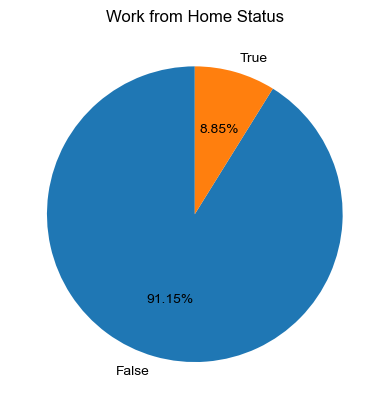

In [16]:
df['job_work_from_home'].value_counts().plot(kind='pie', startangle=90, autopct='%1.2f%%')
plt.title('Work from Home Status')
plt.ylabel('')
plt.show()

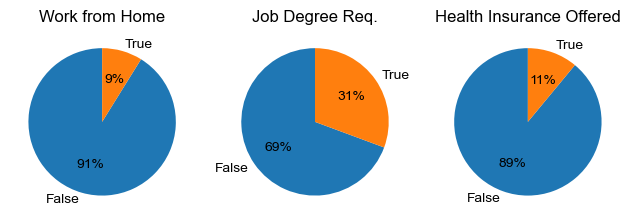

In [17]:
#df[['job_work_from_home', 'job_no_degree_mention', 'job_health_insurance']]

fig, ax= plt.subplots(1,3)

dict_column= {
    'job_work_from_home': 'Work from Home',
    'job_no_degree_mention': 'Job Degree Req.',
    'job_health_insurance': 'Health Insurance Offered'
}

for i, (column,header) in enumerate(dict_column.items()):
    ax[i].pie(df[column].value_counts(), startangle=90, autopct='%1.f%%', labels=['False', 'True'])
    ax[i].set_title(header)
plt.tight_layout()
plt.show()

In [18]:
df_analyst= df[df['job_title_short']== 'Data Analyst'].copy()

In [19]:
df_analyst_exp= df_analyst.explode('job_skills')

In [20]:
skill_states= df_analyst_exp.groupby('job_skills').agg(
    skill_count=('job_skills', 'count'),
    median_salary=('salary_year_avg', 'median')
)
skill_states

,skill_count,median_salary
job_skills,,
airflow,2002,111175.0
airtable,88,90000.0
alteryx,4570,105000.0
angular,376,109101.0
angular.js,2,NaN
...,...,...
wrike,39,75000.0
wsl,16,NaN
xamarin,2,NaN


In [21]:
skill_states= skill_states.sort_values(by='skill_count', ascending=False).head(10)
skill_states

,skill_count,median_salary
job_skills,,
sql,92428,92500.0
excel,66860,84479.0
python,57190,98500.0
tableau,46455,95000.0
power bi,39380,90000.0
r,29996,92527.5
sas,27998,90000.0
powerpoint,13822,85000.0
word,13562,80000.0


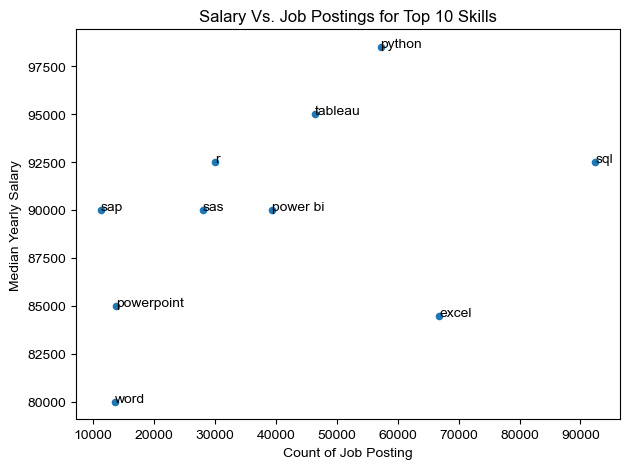

In [22]:
skill_states.plot(kind='scatter', x='skill_count', y='median_salary')
plt.xlabel('Count of Job Posting')
plt.ylabel('Median Yearly Salary')
plt.title('Salary Vs. Job Postings for Top 10 Skills')

for i, skill in enumerate(skill_states.index):
    plt.text(skill_states['skill_count'].iloc[i], skill_states['median_salary'].iloc[i], skill)

plt.tight_layout()
plt.show()

In [23]:
df_analyst['job_posted_month_no']= df_analyst['job_posted_date'].dt.month
df_da_explode= df_analyst.explode('job_skills')

In [24]:
df_da_pivot= df_da_explode.pivot_table(index='job_posted_month_no', columns='job_skills', aggfunc='size', fill_value=0)
df_da_pivot.loc['Total']= df_da_pivot.sum()

In [25]:
df_da_pivot=df_da_pivot[df_da_pivot.loc['Total'].sort_values(ascending=False).index]
df_da_pivot=df_da_pivot.drop('Total')

In [26]:
df_da_pivot= df_da_pivot.reset_index()
df_da_pivot['job_posted_month']= df_da_pivot['job_posted_month_no'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%B'))

In [27]:
df_da_pivot= df_da_pivot.set_index('job_posted_month')
df_da_pivot= df_da_pivot.drop(columns='job_posted_month_no')

In [28]:
df_da_pivot

job_skills,sql,excel,python,tableau,power bi,r,sas,powerpoint,word,sap,...,angular.js,xamarin,gtx,nuxt.js,ovh,esquisse,suse,capacitor,chainer,msaccess
job_posted_month,,,,,,,,,,,,,,,,,,,,,
January,11336,8170,6606,5596,4285,3607,3830,1880,1778,1251,...,2,0,0,1,0,0,0,1,0,0
February,7947,5772,4751,3936,3307,2576,2634,1291,1235,954,...,0,0,0,0,0,0,0,0,0,0
March,7868,5675,4741,4051,3176,2650,2554,1266,1203,892,...,0,1,0,0,0,0,1,0,0,0
April,7553,5496,4557,3776,3106,2399,2598,1190,1177,947,...,0,0,0,0,1,0,0,0,0,0
May,6617,4773,4070,3245,2695,2093,1940,979,957,851,...,0,0,0,0,0,0,0,0,0,1
June,7584,5724,4707,3812,3275,2442,2174,1173,1237,987,...,0,0,0,0,0,0,0,0,0,0
July,7687,5513,4831,3928,3350,2444,2118,1096,1069,996,...,0,0,1,0,0,0,0,0,0,0
August,8823,6482,5576,4533,3859,2975,2560,1332,1298,1117,...,0,0,0,0,0,0,0,0,0,0
September,6829,4886,4229,3446,3118,2146,1880,944,945,852,...,0,0,0,0,0,0,0,0,0,0


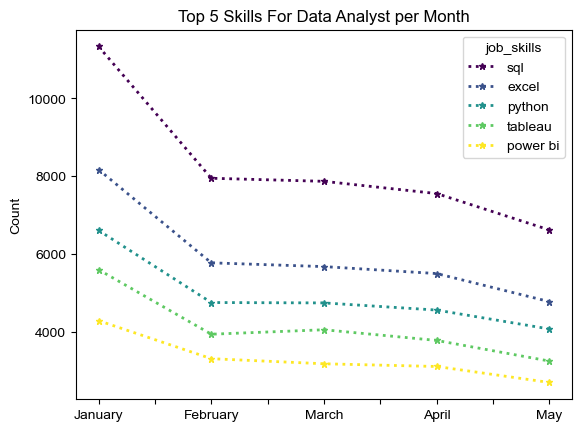

In [29]:
df_da_pivot.iloc[:,:5].head(5).plot(
    kind='line',
    linewidth=2,
    linestyle=':',
    colormap='viridis',
    marker='*',
    markersize=5)
plt.title('Top 5 Skills For Data Analyst per Month')
plt.ylabel('Count')
plt.xlabel('')
plt.show()

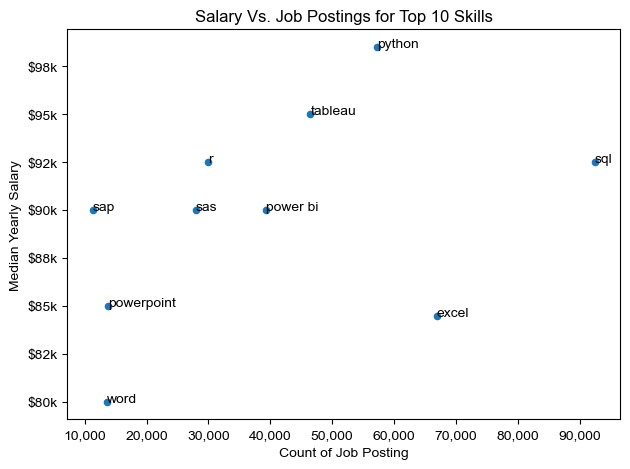

In [30]:

skill_states.plot(kind='scatter', x='skill_count', y='median_salary')
plt.xlabel('Count of Job Posting')
plt.ylabel('Median Yearly Salary')
plt.title('Salary Vs. Job Postings for Top 10 Skills')

for i, skill in enumerate(skill_states.index):
    plt.text(skill_states['skill_count'].iloc[i], skill_states['median_salary'].iloc[i], skill)
ax= plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${y/1000:1.0f}k'))
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{int(x):,}'))
#ax.yaxis.set_major_formatter('${x:1.2f}')
plt.tight_layout()
plt.show()

In [31]:
df_da_us= df[(df['job_title_short']== 'Data Analyst') & (df['job_country']== 'United States')].copy()
df_da_us.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
36,Data Analyst,Data Analyst,"Des Moines, IA",via Trabajo.org,Full-time,False,"Illinois, United States",2023-11-06 13:01:22,False,True,United States,None,NaN,NaN,Assuredpartners,None,None
68,Data Analyst,Sr. Research Data Analyst,"Baltimore, MD",via ZipRecruiter,Full-time,False,"New York, United States",2023-03-24 13:01:00,False,False,United States,None,NaN,NaN,Johns Hopkins Medicine,"[r, zoom]","{'programming': ['r'], 'sync': ['zoom']}"
73,Data Analyst,Entry level / Systems Data Analyst (Remote),Anywhere,via LinkedIn,Contractor,True,"Illinois, United States",2023-06-16 13:18:22,True,True,United States,None,NaN,NaN,Soft Magic,"[word, excel, powerpoint, outlook]","{'analyst_tools': ['word', 'excel', 'powerpoin..."
79,Data Analyst,Data Analyst/Report Writer,"Austin, TX",via Jobs Trabajo.org,Full-time,False,"Texas, United States",2023-08-07 13:18:27,True,False,United States,None,NaN,NaN,Nesco Resource,"[sas, sas, word, excel]","{'analyst_tools': ['sas', 'word', 'excel'], 'p..."
93,Data Analyst,IT Finance / TBM Data Analyst - Remote | WFH,Anywhere,via LinkedIn,Full-time,True,"New York, United States",2023-06-10 13:00:05,False,False,United States,None,NaN,NaN,Get It Recruit - Information Technology,"[oracle, azure, power bi, excel, word, powerpo...","{'analyst_tools': ['power bi', 'excel', 'word'..."


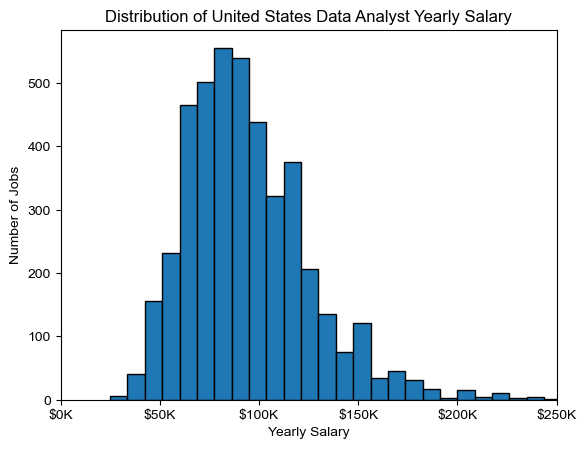

In [32]:
df_da_us['salary_year_avg'].plot(kind='hist', bins=40, edgecolor='black')
ax= plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${x/1000:1.0f}K'))
plt.xlim(0, 250000)
plt.title('Distribution of United States Data Analyst Yearly Salary')
plt.xlabel('Yearly Salary')
plt.ylabel('Number of Jobs')
plt.show()

In [33]:
df_da_us_na= df_da_us.dropna(subset=['salary_year_avg'])

<Axes: >

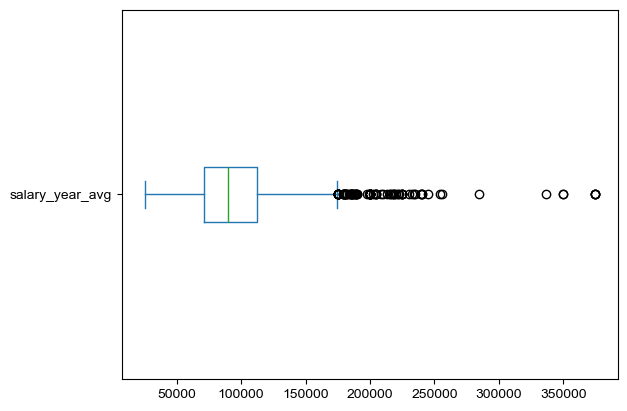

In [34]:
df_da_us_na['salary_year_avg'].plot(kind='box', vert=False)

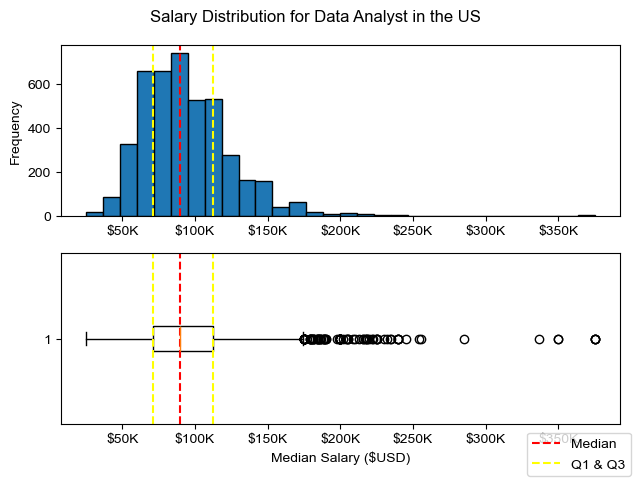

In [35]:
fig, ax= plt.subplots(2,1)
ax[0].hist(x=df_da_us_na['salary_year_avg'], bins=30, edgecolor='black')
#ax[0].set_title('Salary Distribution for Data Analyst in the US')
ax[0].set_xlabel('')
ax[0].set_ylabel('Frequency')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${x/1000:1.0f}K'))

ax[0].axvline(df_da_us_na['salary_year_avg'].median(), color='red', linestyle='--', label='Median')
ax[0].axvline(df_da_us_na['salary_year_avg'].quantile(0.25), color='yellow', linestyle='--', label='Q1 & Q3')
ax[0].axvline(df_da_us_na['salary_year_avg'].quantile(0.75), color='yellow', linestyle='--')
#ax[0].legend(['Median', 'Q1 & Q3'])

ax[1].boxplot(x=df_da_us_na['salary_year_avg'], orientation='horizontal')
ax[1].set_xlabel('Median Salary ($USD)')
ax[1].set_ylabel('')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${x/1000:1.0f}K'))

ax[1].axvline(df_da_us_na['salary_year_avg'].median(), color='red', linestyle='--')
ax[1].axvline(df_da_us_na['salary_year_avg'].quantile(0.25), color='yellow', linestyle='--')
ax[1].axvline(df_da_us_na['salary_year_avg'].quantile(0.75), color='yellow', linestyle='--')

fig.suptitle('Salary Distribution for Data Analyst in the US')
fig.legend(loc='outside right lower')
plt.tight_layout()

In [36]:
job_titles= ['Data Analyst', 'Data Engineer', 'Data Scientist']
df_us= df[(df['job_title_short'].isin(job_titles)) & (df['job_country']== 'United States')].copy()
df_us= df_us.dropna(subset='salary_year_avg')

job_list= [df_us[df_us['job_title_short']== job_title]['salary_year_avg']  for job_title in job_titles]

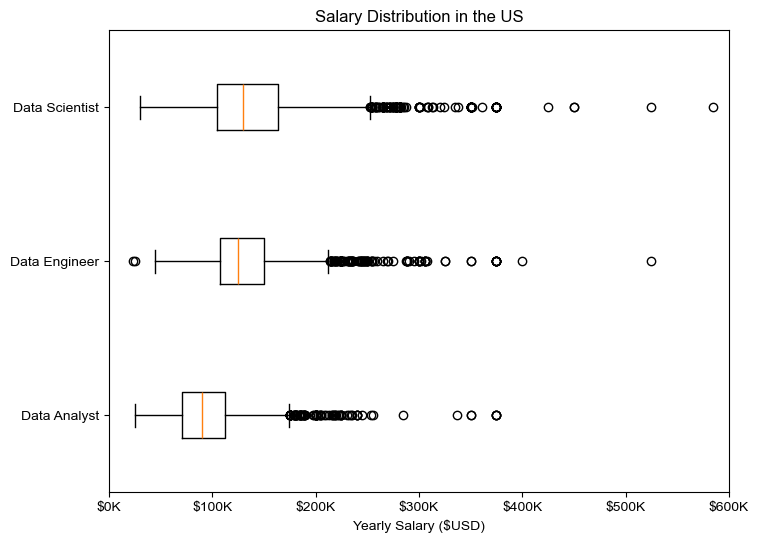

In [37]:
fig= plt.figure(figsize=(8,6))
ax=plt.gca()
plt.boxplot(job_list, tick_labels=job_titles, vert=False)
plt.title('Salary Distribution in the US')
plt.xlabel('Yearly Salary ($USD)')
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${x/1000:1.0f}K'))
plt.xlim(0, 600000)
plt.show()

In [38]:
df_da_us_na= df_da_us_na.explode('job_skills')
df_da_us_na.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
109,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,"Illinois, United States",2023-10-12 13:02:19,False,True,United States,year,89000.0,NaN,Get It Recruit - Transportation,python,"{'analyst_tools': ['alteryx', 'tableau'], 'pro..."
109,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,"Illinois, United States",2023-10-12 13:02:19,False,True,United States,year,89000.0,NaN,Get It Recruit - Transportation,r,"{'analyst_tools': ['alteryx', 'tableau'], 'pro..."
109,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,"Illinois, United States",2023-10-12 13:02:19,False,True,United States,year,89000.0,NaN,Get It Recruit - Transportation,alteryx,"{'analyst_tools': ['alteryx', 'tableau'], 'pro..."
109,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,"Illinois, United States",2023-10-12 13:02:19,False,True,United States,year,89000.0,NaN,Get It Recruit - Transportation,tableau,"{'analyst_tools': ['alteryx', 'tableau'], 'pro..."
180,Data Analyst,Data Analyst III,"Dos Palos, CA",via My ArkLaMiss Jobs,Full-time,False,"California, United States",2023-02-27 13:00:39,False,True,United States,year,90250.0,NaN,California Health & Wellness,excel,"{'analyst_tools': ['excel', 'powerpoint']}"


In [39]:
df_da_us_group= df_da_us_na.groupby('job_skills')['salary_year_avg'].agg(['count', 'median'])

In [40]:
df_da_us_group

,count,median
job_skills,,
airflow,44,116250.00
airtable,5,90000.00
alteryx,106,106281.25
angular,8,107500.00
ansible,1,159640.00
...,...,...
wire,4,74250.00
word,461,81194.75
workfront,3,75000.00


In [41]:
df_da_top_pay= df_da_us_group.sort_values(by='median', ascending=False).head(10)
df_da_top_pay

,count,median
job_skills,,
dplyr,2,196250.0
bitbucket,3,189000.0
gitlab,3,186000.0
solidity,1,179000.0
hugging face,1,175000.0
couchbase,1,160515.0
ansible,1,159640.0
mxnet,2,149000.0
cassandra,6,148250.0


In [44]:
df_da_skills= df_da_us_group.sort_values(by='count', ascending=False).head(10).sort_values(by='median', ascending=False)
df_da_skills

,count,median
job_skills,,
python,1431,97500.00
tableau,1364,92875.00
r,893,92500.00
sql server,286,92500.00
sql,2508,91000.00
sas,926,90000.00
power bi,838,90000.00
powerpoint,462,85000.00
excel,1808,84392.00


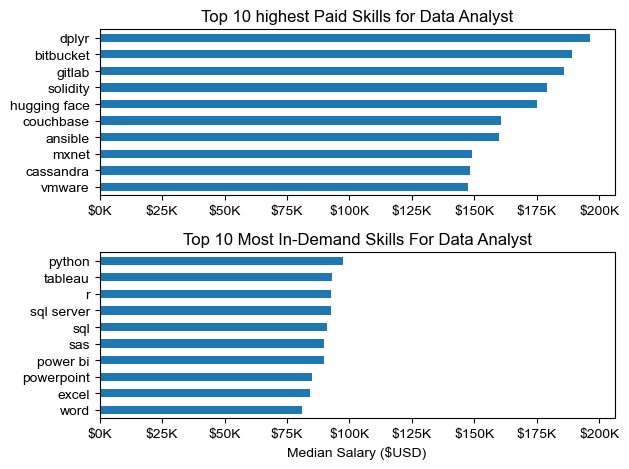

In [ ]:
fig, ax= plt.subplots(2,1)
df_da_top_pay.plot(kind='barh', y='median', ax=ax[0], legend=False)
ax[0].invert_yaxis()
ax[0].set_title('Top 10 highest Paid Skills for Data Analyst')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${x/1000:1.0f}K'))

df_da_skills[::-1].plot(kind='barh', y='median', ax=ax[1])
ax[1].set_xlim(ax[0].get_xlim())
ax[1].set_title('Top 10 Most In-Demand Skills For Data Analyst')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary ($USD)')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${x/1000:1.0f}K'))
ax[1].legend().remove()

plt.tight_layout()

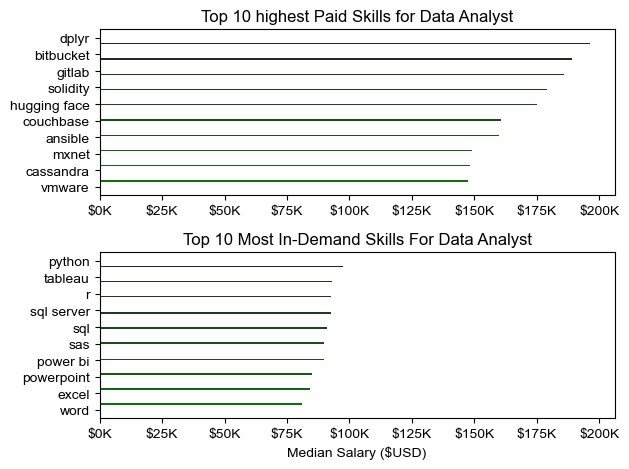

In [123]:
fig, ax= plt.subplots(2,1)

sns.barplot(data=df_da_top_pay, x='median', y=df_da_top_pay.index, ax=ax[0], hue='median', palette='dark:g_r')
ax[0].legend().remove()
ax[0].set_title('Top 10 highest Paid Skills for Data Analyst')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${x/1000:1.0f}K'))


sns.barplot(data=df_da_skills, x='median', y=df_da_skills.index, ax=ax[1], hue='median', palette='dark:g_r')
ax[1].legend().remove()
ax[1].set_xlim(ax[0].get_xlim())
ax[1].set_title('Top 10 Most In-Demand Skills For Data Analyst')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary ($USD)')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${x/1000:1.0f}K'))


plt.tight_layout()
plt.show()

0.12.2
